# Py: Hierarchical clustering on COVID dataset

**This notebook was originally created by Amanda Aitken for the Data Analytics Applications subject, as *Exercise 6.5 - Hierarchical clustering on COVID dataset* in the *DAA M06 Unsupervised learning* module.**

**Data Analytics Applications is a Fellowship Applications (Module 3) subject with the Actuaries Institute that aims to teach students how to apply a range of data analytics skills, such as neural networks, natural language processing, unsupervised learning and optimisation techniques, together with their professional judgement, to solve a variety of complex and challenging business problems. The business problems used as examples in this subject are drawn from a wide range of industries.**

**Find out more about the course [here](https://www.actuaries.asn.au/education-program/fellowship/subjects-and-syllabus/data-analytics-applications-subject).**

### Purpose:
This notebook performs Hierarchical clustering on COVID data.

### References:
The dataset that is used in this exercise was sourced from Our World in Data: https://ourworldindata.org/covid-cases.

This dataset was downloaded from the above link on 31 March 2021. It contains country-by-country data on confirmed coronavirus disease (COVID-19) cases and at the time of writing is updated on a daily basis.

The data contains COVID-19 and population related features for over 100 countries. These features include:
- total cases per million people;
- total new cases per million people;
- total deaths per million people;
- new deaths per million people;
- reproduction rate of the disease;
- positive testing rate;
- total tests per thousand people;
- icu patients per million people; and
- hospital patients per million people.

## Packages
This section installs packages that will be required for this exercise/case study.

In [1]:
import pandas as pd # For data management.
import matplotlib.pyplot as plt # For plotting.
from scipy.cluster import hierarchy # For performing hierarchical clustering.

## Data
This section:
- imports the data that will be used in the modelling; and
- prepares the data for modelling.

### Import data

In [2]:
covid = pd.read_csv(
    'https://actuariesinstitute.github.io/cookbook/_static/daa_datasets/DAA_M06_COVID_data.csv.zip', 
    header = 0)

# Note that the following code could be used to read the most
# recent data in directly from the Our World in Data website:

# covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
# However, we will use a snapshot so that the notebook keeps working even if the dataset format changes.

### Prepare data

In [3]:
# Restrict the data to only look at one point in time (31-Dec-2020).
covid2 = covid[covid['date']=='2020-12-31']

# This analysis will use nine features in the clustering.
# The column 'location' is also retained to give us the country names.
# Countries that have missing values at the extract date are dropped from
# the data table using the .dropna() method.
covid3 = covid2[['location','total_cases_per_million','new_cases_per_million',
                   'total_deaths_per_million','new_deaths_per_million',
                   'reproduction_rate','positive_rate','total_tests_per_thousand',
                 'icu_patients_per_million','hosp_patients_per_million']].dropna()

covid_data = covid3.drop(columns='location')
print(covid_data.info())

countries = covid3['location'].tolist()
print(countries)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4823 to 74527
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_cases_per_million    17 non-null     float64
 1   new_cases_per_million      17 non-null     float64
 2   total_deaths_per_million   17 non-null     float64
 3   new_deaths_per_million     17 non-null     float64
 4   reproduction_rate          17 non-null     float64
 5   positive_rate              17 non-null     float64
 6   total_tests_per_thousand   17 non-null     float64
 7   icu_patients_per_million   17 non-null     float64
 8   hosp_patients_per_million  17 non-null     float64
dtypes: float64(9)
memory usage: 1.3 KB
None
['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Portugal', 'Slovenia', 'Spain', 'United Kingdom', 'United States']


## Modelling
This section performs agglomerative hierarchical clustering.

### Create a dendrogram

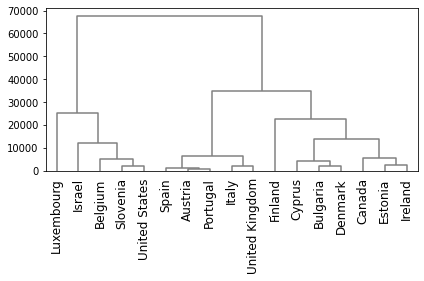

In [4]:
# Perform agglomeratorive hierarchical clustering on the COVID data.

# The SciPy linkage() function performs hierarchical clustering
# and the dendrogram() function can be used to visualize the
# results of the clustering.

# Perform the hierarchical clustering using 'euclidean' distance measure and
# 'complete' linkage (i.e. max distance between points in each cluster).
clusters = hierarchy.linkage(covid_data,metric='euclidean',method='complete')
  # Instead of using 'euclidean' as the distance between observations, try using
  # other metrics such as 'correlation'.
  # Instead of using 'complete' as the linkage between clusters, try using
  # other methods such as 'single', 'average' or 'centroid'.

# Plot the dendrogram, using countries as labels.
hierarchy.dendrogram(clusters,
           labels=countries,
           leaf_rotation=90,
           leaf_font_size=12,
           color_threshold = 0,
           above_threshold_color='grey')
plt.tight_layout()
#plt.savefig('M06 Fig7.jpg')
plt.show()

### Cut the dendrogram to create clusters

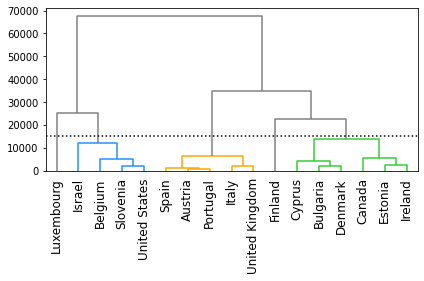

In [5]:
# Plot a horizontal line on the dendrogram to 'cut' it into different clusters.

# Specify the height at which the dengrogram will be 'cut' to create clusters.
cut_height = 15000

# Set the colour palette to be used in the dendrogram.
colour1 = 'dodgerblue'
colour2 = 'orange'
colour3 = 'limegreen'
hierarchy.set_link_color_palette([colour1, colour2, colour3])

hierarchy.dendrogram(clusters,
                    labels=countries,
                    leaf_rotation=90,
                    leaf_font_size=12,
                    color_threshold=cut_height,
                    above_threshold_color='grey')
plt.tight_layout()
plt.plot((0,200),(cut_height,cut_height),color='black',linestyle=':')
# plt.savefig('M06 Fig10.jpg')
plt.show()